## Ensemble: Bagging x Boosting x Stacking

### Conteúdo dessa aula:
- Tipos de Ensemble
- Bagging: Random Forest

Ensemble nada mais é do que a **sabedoria da maioria**. Aqui combinamos vários modelos mais simples em um único 
modelo robusto a fim de reduzir o viés, variância e/ou aumentar a acurácia.
<br>


## Tipos de Ensemble:
- __1. Bagging (short for bootstrap aggregation)__: Treina paralelamente N modelos mais fracos (geralmente do mesmo tipo - homogêneo) com __N subsets distintos__ criados com __amostragem randômica e reposição (bootstrap)__. Cada modelo é avaliado na fase de teste com o label definido pela moda (classificação) ou pela __média dos valores__ (regressão). Devido à essa agregação final que vem o aggregation do nome. Os métodos de Bagging reduzem a variância da predição. <br>
Algoritmos  famosos: Random Forest <br>
<img src='images/bagging.png' style="width:600px"  text="http://cheatsheets.aqeel-anwar.com" />  
<br>
<br>

- __2. Boosting__: Treina N modelos mais fracos (geralmente do mesmo tipo - homogênio) de forma sequencial. Os pontos que foram classificados erroneamente recebem um peso maior para entrar no próximo modelo. Na fase de teste, cada modelo é avaliado com base do erro de teste de cada modelo, a predição é feita com um peso sobre a votação. Os métodos de Boosting reduzem o viés da predição. <br>
Algoritmos  famosos: AdaBoost, Gradient Boosting, XGBoost, CatBoost, LightGBM (Light Gradient Boosting Machine) <br>
<img src='images/boosting.png' style="width:600px" text="Fonte: http://cheatsheets.aqeel-anwar.com" />
<br>
<br>

- __3. Ensemble de modelos distintos__: Treina N modelos distintos, por exemplo: um Random Forest e um SVM e faz a previsão de acordo com a saída desses modelos. 
<br>
<br>


- __4. Stacking__: Treina N modelos mais fracos (geralmente de tipos distintos - heterogênio) em um subset do conjunto de dados. Uma vez que os modelos foram treinados, cria-se um novo modelo (meta learning) para combinar a saída de cada um dos modelos mais fracos resultando na predição final. Isso é feito no segundo subset dos dados. Na fase de teste, cada modelo mais fraco faz sua predição independentemente e esses labels entram como features do meta learner para gerar a predição final.
<br>
<img src='images/stacking.png' style="width:600px" text="Fonte: http://cheatsheets.aqeel-anwar.com" />
<br>
<br>

##### Resumo:
<img src='images/comparison_img.png' style="width:600px" text="Fonte: https://quantdare.com/what-is-the-difference-between-bagging-and-boosting" />

<img src='images/comparison.png' style="width:600px" />


## Bagging: [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Uma técnica muito interessante baseada em árvores é o **Random Forest**. O random forest faz um ensemble de modelos de árvore de decisão, mas com duas melhorias: 

> Selecionamos **aleatoriamente com reposição** algumas linhas da base original. Isso gera um novo dataset (reamostrado), chamado de **bootstrapped dataset**. O número de linhas do dataset reamostrado é controlável.

> __Cada vez que fazemos um split das árvores de decisão, apenas uma amostra aleatória das features é comparada para escolher o split__. A quantidade de features a serem consideradas é controlável. (max_features e bootstrap_features). 

<img src="https://www.researchgate.net/profile/Nikolaos-Sapountzoglou/publication/339447755/figure/fig1/AS:862073311469568@1582545702096/Example-of-a-random-forest.png" width=800>

Dessa forma, cada árvore será treinada em um dataset diferente (devido ao bootstrap) e assim, cada modelo cometerá erros em diferentes lugares gerando um viés e uma variância diferente para cada um. 

Esse processo é denominado de **bootstrapping** e ele introduz **duas fontes de aleatoriedade**, cujo objetivo é **diminuir a variância** (tendência a overfitting) do modelo.

De fato, árvores individuais são facilmente overfitadas, como discutimos em aula (lembre-se da grande flexibilidade da hipótese em encontrar condições favoráveis à aprendizagem dos ruídos!).

Com esta aleatorização introduzida pelo bootstrapping, o objetivo é que as árvores construídas sejam **independentes**, de modo que **os erros cometidos por cada uma sejam independentes** e dessa forma as RFs atacam o principal problema das DTs: a variância.

Deste modo, se considerarmos as previsões isoladas e de alguma forma **agregar** as previsões, a expectativa é que o modelo final seja **menos propenso a overfitting**! Mas, uma pergunta natural é: o que é essa "agregação"? Aqui entra o segundo elemento do bagging...

Como cada árvore produz **o seu target**, a **agregação** é utilizada para tomar a decisão final:

> No caso de classificação, a classe final é atribuída como **a classe majoritária**, isso é, **a classe que foi o output $\hat{y}$ mais vezes dentre todas as árvores**;

> No caso de regressão, o valor final é atribuído como **a média dos valores preditos $\hat{y}$ por cada árvore**.

Note que em ambos os casos, o procedimento de agregação pode ser visto como uma **média**, e o sklearn deixa isso explícito: "*In contrast to the original publication, the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.*"

Tomando a média como procedimento de agregação, a expectativa é que **alguns erros sejam anulados**, garantindo uma previsão final **mais estável e mais generalizável**, dado que os ruídos são eliminados.

Esses dois processos juntos, bootstrap e agregation, são nomeados de bagging.

No final de todo o processo de construção das árvores, as features mais importantes terão uma probabilidade maior de aparecer próximas às raízes das árvores (root), enquanto features menos importantes aparecerão próximas aos nós finais (leaves). Dessa forma, é possível estimar a importância de uma feature calulando a profundidade média em que ela aparece ao longo de todas as árvores.

Agora pensem: é ruim termos duas variáveis muito correlacionas nesse tipo de modelagem?

#### Pré-processamento dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/bank-full.csv") 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Attribute Information:

   - age (numeric)
   - job : type of job (categorical: admin.', 'bluecollar', 'entrepreneur', 'housemaid', 'management', 'retired', 'selfemployed', 'services', 'student', 'technician', 'unemployed', 'unknown')
   - marital : marital status (categorical:'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
   - education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
   - default: has credit in default? (categorical: 'no','yes','unknown')
   - balance: average yearly balance, in euros (numeric)
   - housing: has housing loan? (categorical: 'no','yes','unknown')
   - loan: has personal loan? (categorical: 'no','yes','unknown')
   - contact: contact communication type (categorical:'cellular','telephone','unknown')
   - day: last contact day of the month (numeric 1 -31)
   - month: last contact month of year (categorical: 'jan', 'feb','mar', …, 'nov', 'dec')
   - duration: last contact duration, in seconds (numeric).
    Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   - previous: number of contacts performed before this campaign and for this client (numeric)
   - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
   - target: has the client subscribed a term deposit? (binary:"yes", "no")


In [13]:
#### Separar feature e target
y = df['Target'].copy()
x = df.drop(['Target', 'duration'], axis=1).copy()

#### particionar dados
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42) 

In [14]:
# Resetar os index
X_train, X_test, y_train, y_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True), y_train.reset_index(drop=True), y_test.reset_index(drop=True)

In [15]:
# Selecionar as colunas categóricas e numéricas
cat_columns = X_train.select_dtypes(['object']).columns
num_columns = X_train.select_dtypes(exclude=['object']).columns
cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [16]:
# Printa valores de cada coluna categórica
[print(f"{c}: {X_train[c].unique()}") for c in cat_columns]

job: ['technician' 'student' 'unemployed' 'blue-collar' 'management' 'services'
 'admin.' 'retired' 'unknown' 'entrepreneur' 'housemaid' 'self-employed']
marital: ['divorced' 'single' 'married']
education: ['secondary' 'tertiary' 'primary' 'unknown']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['telephone' 'cellular' 'unknown']
month: ['aug' 'apr' 'jul' 'feb' 'jun' 'may' 'nov' 'mar' 'oct' 'jan' 'sep' 'dec']
poutcome: ['unknown' 'failure' 'other' 'success']


[None, None, None, None, None, None, None, None, None]

In [17]:
y_test

0       no
1       no
2       no
3       no
4       no
        ..
9038    no
9039    no
9040    no
9041    no
9042    no
Name: Target, Length: 9043, dtype: object

In [18]:
# Converte colunas categóricas em numéricas
# Importa OneHotEncoder e LabelEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Intância ambos
ohe = OneHotEncoder(drop='first', sparse=False)
le = LabelEncoder()

# Enconding das features categóricas
X_train_enc = ohe.fit_transform(X_train[cat_columns])
X_test_enc = ohe.transform(X_test[cat_columns])

# Converte para pandas dataframe renomeando as colunas
X_train_enc = pd.DataFrame(X_train_enc, columns=ohe.get_feature_names_out(cat_columns))
X_test_enc = pd.DataFrame(X_test_enc, columns=ohe.get_feature_names_out(cat_columns))


In [19]:
X_train_enc

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36166,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:

# Concatena colunas do encoder com as numéricas
X_train = pd.concat([X_train_enc, X_train[num_columns]], axis=1)
X_test = pd.concat([X_test_enc, X_test[num_columns]], axis=1)
X_train.head(10)


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_sep,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,36,861,29,2,-1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24,4126,5,4,185,7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,44,244,12,4,-1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,48,0,31,11,-1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,38,257,26,10,-1,0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,48,1513,17,1,-1,0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50,4315,22,11,-1,0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,46,-780,5,1,-1,0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,46,474,9,2,-1,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,45,248,16,2,-1,0


In [22]:
y_train.values

array(['no', 'yes', 'yes', ..., 'no', 'no', 'yes'], dtype=object)

In [23]:
# Encoding dos labels
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [25]:
y_train

array([0, 1, 1, ..., 0, 0, 1])

In [27]:
# Temos classes desbalanceadas?
pd.value_counts(y_train, normalize=True)

0    0.883018
1    0.116982
dtype: float64

[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [28]:
# Vamos importar o modelo de classificação do Random Forest
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Instancia a classe do modelo
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced', oob_score=True)

# Faz o treino na base de treino
model_rf.fit(X_train, y_train)

# Faz a predição do modelo treinado na base de teste
y_pred_rf = model_rf.predict(X_test)

In [33]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
# Obter parâmetros utilizados no treino do modelo
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [37]:
model_rf.oob_score_

0.8929716876797169

In [38]:
# Obter probabilidades estimadas para cada classe
model_rf.predict_proba(X_test)

array([[1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       ...,
       [0.92, 0.08],
       [0.85, 0.15],
       [0.92, 0.08]])

#### Avaliar o modelo

In [39]:
# Importa classes que serão utilizadas
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Gera o classification_report para o teste
print(classification_report(y_test, y_pred_rf ))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.66      0.20      0.31      1058

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



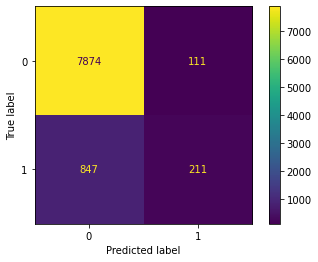

In [40]:
# Calcula a confusion_matrix para o teste
cm = confusion_matrix(y_test, y_pred_rf )

# Plota a confusion matrix
ConfusionMatrixDisplay(cm).plot()

## Feature Importance

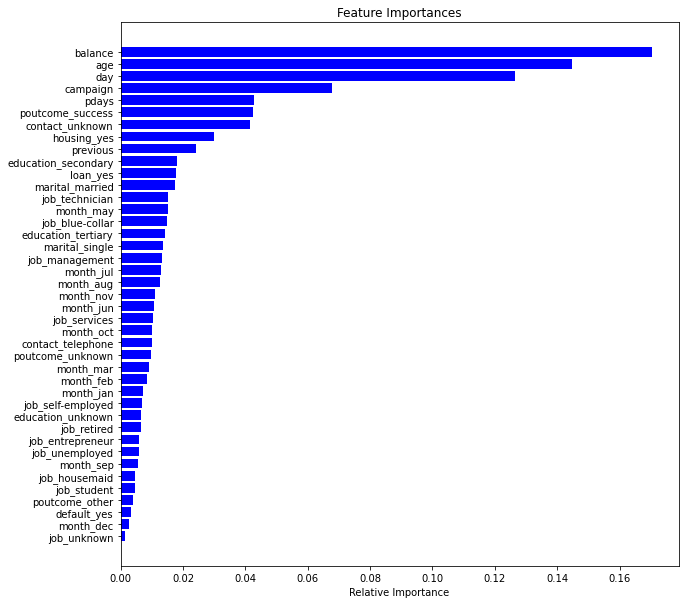

In [41]:
features = X_train.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

O que aconteceria aqui se tivéssemos classes muito correlacionadas?

Podemos criar modelos menos complexos selecionando as features mais importantes:

In [43]:
importance = ['balance', 'age', 'day', 'poutcome_success', 'pdays', 'campaign', 'housing_yes', 'previous']

# Instancia modelo
model_rfi = RandomForestClassifier(random_state=42, class_weight='balanced')

# Faz o fit considerando apenas as variáveis mais importantes
model_rfi.fit(X_train[importance], y_train)

# Faz o predict apenas nas variáveis mais importantes
y_pred_rfi = model_rfi.predict(X_test[importance])

# Classification report
print(classification_report(y_test, y_pred_rfi))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.54      0.18      0.27      1058

    accuracy                           0.89      9043
   macro avg       0.72      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



Com um modelo bem menos complexo conseguimos um resultado próximo do modelo no qual utilizamos todas as features.

_____________________________________________
_____________________________________________
_____________________________________________

### Random Search

In [51]:
# Critério do split
criterions = ['gini', 'entropy', 'log_loss']

# Profundidades máximas que iremos testar
max_depth = list(np.arange(2, 12))
max_depth.append(None)

# Número de pontos mínimos necessário para permitir um split no nó
min_samples_split = np.arange(4, 11)

# Número de pontos mínimos que podem existir em cada folha (nó final)
min_samples_leaf = np.arange(2, 8)

# Quantidade de árvores treinadas
n_estimators = np.arange(4, 22, 2)

# Criamos o grid de escolhas
params_grid = {'criterion': criterions,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'n_estimators': n_estimators}

params_grid

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, None],
 'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10]),
 'min_samples_leaf': array([2, 3, 4, 5, 6, 7]),
 'n_estimators': array([ 4,  6,  8, 10, 12, 14, 16, 18, 20])}

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

model_rfr = RandomForestClassifier(random_state=42, class_weight='balanced')
random = RandomizedSearchCV(model_rfr, param_distributions=params_grid, return_train_score=True,
                            cv=5, n_iter=50, scoring='f1', verbose=2)

In [53]:
random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=log_loss, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END criterion=log_loss, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END criterion=log_loss, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END criterion=log_loss, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END criterion=log_loss, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=10, n_estimators=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=10, n_estimators=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=10, n_estimators=6; total ti

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, None],
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 4,  6,  8, 10, 12, 14, 16, 18, 20])},
                   return_train_score=True, scoring='f1', verbose=2)

In [54]:
y_pred_random = random.predict(X_test)

print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7985
           1       0.40      0.56      0.47      1058

    accuracy                           0.85      9043
   macro avg       0.67      0.73      0.69      9043
weighted avg       0.88      0.85      0.86      9043



In [55]:
f1_score(y_test, y_pred_random)

0.4682352941176471

# qual o f1 que ele retorna 

In [59]:
X_train

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_sep,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,36,861,29,2,-1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24,4126,5,4,185,7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,44,244,12,4,-1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,48,0,31,11,-1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,38,257,26,10,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50,917,30,2,-1,0
36164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,36,22,22,5,-1,0
36165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,45,79,25,1,-1,0
36166,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,27,2559,6,1,-1,0


In [56]:
cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [62]:
from imblearn.over_sampling import SMOTE

imb = SMOTE(random_state=42)

X_train_imb, y_train_imb = imb.fit_resample(X_train, y_train)
X_train_imb

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_sep,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous
0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,...,0.0,0.0,0.000000,1.0,36,861,29,2,-1,0
1,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,24,4126,5,4,185,7
2,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,...,0.0,0.0,0.000000,1.0,44,244,12,4,-1,0
3,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0,...,0.0,0.0,0.000000,1.0,48,0,31,11,-1,0
4,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,...,0.0,0.0,0.000000,1.0,38,257,26,10,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63869,0.42126,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.578740,0.0,...,0.0,0.0,0.000000,1.0,50,-189,16,1,-1,0
63870,0.00000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,1.0,30,2544,10,2,-1,0
63871,0.00000,0.0,0.0,0.631322,0.368678,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,1.0,56,299,18,2,-1,0
63872,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.045156,0.954844,0.0,...,0.0,0.0,0.045156,0.0,53,3450,10,1,182,1


In [64]:
pd.value_counts(y_train_imb)

0    31937
1    31937
dtype: int64

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

model_rfimb = RandomForestClassifier(random_state=42, class_weight='balanced')
random = RandomizedSearchCV(model_rfimb, param_distributions=params_grid, return_train_score=True,
                            cv=5, n_iter=50, scoring='f1', verbose=2)

random.fit(X_train_imb, y_train_imb)

y_pred_imb = random.predict(X_test)

print(classification_report(y_test, y_pred_imb))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=log_loss, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=6, min_samples_split=9, n_estimators=16; total time=   0.7s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=6, min_samples_split=9, n_estimators=16; total time=   0.5s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=6, min_samples_split=9, n_estimators=16; 

In [69]:
dff = pd.concat([X_train_imb, pd.DataFrame(y_train_imb)], axis=1)
dff.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,36,861,29,2,-1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,24,4126,5,4,185,7,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,44,244,12,4,-1,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,48,0,31,11,-1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,38,257,26,10,-1,0,0


In [70]:
dff[dff[0]==1]

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,0
1,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,...,0.0,0.000000,0.0,24,4126,5,4,185,7,1
2,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,...,0.0,0.000000,1.0,44,244,12,4,-1,0,1
14,0.00000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,1.0,59,679,30,4,-1,0,1
27,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0,...,1.0,0.000000,0.0,39,265,27,1,555,2,1
40,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,1.0,0.000000,0.0,34,151,12,1,370,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63869,0.42126,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.578740,0.0,...,0.0,0.000000,1.0,50,-189,16,1,-1,0,1
63870,0.00000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,1.0,30,2544,10,2,-1,0,1
63871,0.00000,0.0,0.0,0.631322,0.368678,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,1.0,56,299,18,2,-1,0,1
63872,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.045156,0.954844,0.0,...,0.0,0.045156,0.0,53,3450,10,1,182,1,1


In [67]:
X_train_imb.head(20)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_sep,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,36,861,29,2,-1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24,4126,5,4,185,7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,44,244,12,4,-1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,48,0,31,11,-1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,38,257,26,10,-1,0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,48,1513,17,1,-1,0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50,4315,22,11,-1,0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,46,-780,5,1,-1,0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,46,474,9,2,-1,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,45,248,16,2,-1,0


In [66]:
print(classification_report(y_test, y_pred_imb))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7985
           1       0.52      0.31      0.39      1058

    accuracy                           0.89      9043
   macro avg       0.72      0.64      0.66      9043
weighted avg       0.87      0.89      0.87      9043



## Invertendo a ordem e aplicando o SMOTENC antes

In [80]:
# As colunas categoricas vão até o indice 34
X_train.iloc[:, :35]

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36166,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [77]:
from imblearn.over_sampling import SMOTENC

categorical_features = np.arange(0,35)
# precisamos passar quais os índices das variáveis caetgóricas
smotenc = SMOTENC(random_state=42, categorical_features=categorical_features)

In [82]:
# mostrando quais são as featutes categóricas
X_train.iloc[:, categorical_features].head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [83]:
X_train_imb2, y_train_imb2 = smotenc.fit_resample(X_train, y_train)
X_train_imb2

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_sep,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,36,861,29,2,-1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24,4126,5,4,185,7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,44,244,12,4,-1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,48,0,31,11,-1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,38,257,26,10,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63869,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,46,-191,10,1,-1,0
63870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,32,2537,25,5,-1,0
63871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,56,304,18,1,-1,0
63872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,54,3450,10,1,181,2


In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

model_rfimb = RandomForestClassifier(random_state=42, class_weight='balanced')
random = RandomizedSearchCV(model_rfimb, param_distributions=params_grid, return_train_score=True,
                            cv=5, n_iter=50, scoring='f1', verbose=2)

random.fit(X_train_imb2, y_train_imb2)

y_pred_imb2 = random.predict(X_test)

print(classification_report(y_test, y_pred_imb2))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=8; total time=   0.2s
[CV] END criterion=log_loss, max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=12; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=12; total 

In [85]:
print(classification_report(y_test, y_pred_imb2))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7985
           1       0.43      0.36      0.39      1058

    accuracy                           0.87      9043
   macro avg       0.67      0.65      0.66      9043
weighted avg       0.86      0.87      0.86      9043



In [90]:
# Olhando como ficaram nossas amostras provindas do imbalance
dff2 = pd.concat([X_train_imb2, pd.DataFrame(y_train_imb2)], axis=1)
dff2[dff2[0]==1].head(30)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,24,4126,5,4,185,7,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,44,244,12,4,-1,0,1
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,59,679,30,4,-1,0,1
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,39,265,27,1,555,2,1
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,34,151,12,1,370,1,1
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,36,1031,17,4,-1,0,1
47,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,52,3634,8,8,-1,0,1
55,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,70,2346,24,1,184,5,1
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,26,689,25,2,-1,0,1
61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,43,733,19,3,-1,0,1


In [91]:
dff2.job_management.unique()

array([0., 1.])

___________
___________
___________

### Como ficaria esse código com Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as pp
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV, train_test_split, cross_validate
from imblearn.under_sampling import RandomUnderSampler

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42) 

importance_pipe = ['duration', 'balance', 'age', 'day', 'poutcome', 'pdays', 'campaign', 'housing', 'previous']
cat_columns_pipe = [c for c in cat_columns if c in importance_pipe]

# Encoding dos labels
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Criando pipeline das variáveis categóricas
cat_pipe = Pipeline([
    ('ohe', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))
])

# Para termos no modelo tanto as variáveis categóricas quanto as numéricas
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_columns_pipe)
], remainder='passthrough')

# Criando pipeline final
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Tunando hiperparâmetros com 3-fold cross-validation e pipelines
parameters = {'model__max_depth': [3, 4, 5],
              "model__n_estimators" : [5, 8, 10],
              "model__criterion" : ["gini", "entropy"],}

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
# grid = GridSearchCV(pipe, param_grid=parameters, cv=kfold, scoring='f1', n_jobs=2)
grid = RandomizedSearchCV(pipe, param_distributions=parameters, cv=kfold, scoring='f1', n_jobs=2)
grid.fit(x_train[importance_pipe], y_train)

# qual o melhor parâmetro
grid.best_params_ 


In [ ]:
# Predizendo no x_test
y_pred = grid.predict(x_test[importance_pipe])

print(classification_report(y_test, y_pred))

Podemos predizer em uma única amostra de dado

In [ ]:
my_data = x_test[importance_pipe].iloc[[77]]
y_pred_ = grid.predict(my_data)
print(my_data)
print(y_pred_)

Se quisermos fazer um tratamento de classes desbalanceadas, precisamos utilizar o Pipeline do pacote imblearn:

In [ ]:
from imblearn.pipeline import Pipeline as pp
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

steps = [('over', SMOTE()), 
         ('scale', MinMaxScaler()),
         ('model', RandomForestClassifier())]
pipeline = pp(steps=steps)
scores = cross_validate(pipeline, x_train[num_columns], y_train, scoring='roc_auc', cv=3, n_jobs=-1)
scores

In [ ]:
# Tunando hiperparâmetros com 3-fold cross-validation e pipelines
parameters = {'model__max_depth': [3, 4, 5],
              "model__n_estimators" : [100, 150, 200],
              "model__criterion" : ["gini", "entropy"],}

grid_imbalanced = RandomizedSearchCV(pipeline, param_distributions=parameters, cv=3, scoring='f1', n_jobs=2)

# Vamos usar só variáveis numéricas por causa do SMOTE
importance_pipe_num = [c for c in importance if c in num_columns]

grid_imbalanced.fit(x_train[importance_pipe_num], y_train)

# qual o melhor parâmetro
grid_imbalanced.best_params_ 

____________________
______________________
________________

## Vantagens e Desvantagens
__Vantagens:__
* Geralmente fornecem modelos com alta acurácia (classificação)
* Necessita de pouco tratamento dos dados
* Conseguem lidar com dados faltantes (dois métodos: média dos valores para repor variáveis contínuas e computa proximity-weighted average)
* Fornece uma estimativa da importancia das features
* São robustos aos [outliers](https://stats.stackexchange.com/questions/187200/how-are-random-forests-not-sensitive-to-outliers) nas variáveis independentes e conseguem lidar com eles automaticamente (tendem a isolar os outliers)
* Podem ser usados na seleção de features
* Conseguem construir fronteiras de decisão não-lineares
* Os dados não precisam seguir uma distribuição normal (como em modelos lineares), mas vale testar!
* Lidam bem com uma quantidade muito grande de dados e features

__Desvantagens:__
* No RF as variáveis categóricas não ordinais devem ser convertidas para dummies ([mean encoding](https://towardsdatascience.com/why-you-should-try-mean-encoding-17057262cd0))
* Não é recomendado utilizar nenhum modelo que depende do bagging em problemas com classes desbalanceados. Em dados extremamente desbalanceados existe uma probabilidade significativa de uma amostra ser selecionada com poucas ou nenhuma amostra da classe minoritária.
* Não é muito recomendado na extrapolação de dados (suponha a predição de preço de casas. Se sua regressão linear foi treinada com casas até 4 quartos e no teste aparece uma de 8 você consegue extrapolar e prever de forma consistente. Com os modelos de árvore não.)
* Em geral, não lidam bem com dados muito esparsos.
* É menos interpretável que uma regressão linear ou uma árvore de decisão, por exemplo.


## Bibliografia e Aprofundamento
- [Problemas com as variáveis dummies](https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769)
- [When to avoid RF](https://stats.stackexchange.com/questions/112148/when-to-avoid-random-forest)
- [Very skewed data](https://stats.stackexchange.com/questions/172842/best-practices-with-data-wrangling-before-running-random-forest-predictions)
- [Como RF lida com missing](https://www.numpyninja.com/post/all-about-random-forests-and-handling-missing-values-in-them)
- [Feature Importance x Feature Permutation](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)
- [Out-of-bag error](https://en.wikipedia.org/wiki/Out-of-bag_error)
- [OOB error vs. test set error](https://uc-r.github.io/random_forests)
- [Principais dúvidas no XGBoost](https://towardsdatascience.com/20-burning-xgboost-faqs-answered-to-use-the-library-like-a-pro-f8013b8df3e4)

## Exercício
Utilize o dataset "data/german_credit_data.csv" para implementar o Random Forest e o XGBoost.


In [ ]:
df = pd.read_csv("../data/german_credit_data.csv", index_col=0)

X = df.drop(columns="Risk")
y = df["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
